<a href="https://colab.research.google.com/github/sanhiitaa/game-recommendation-system/blob/main/game_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# making the root directory to store the api token
! mkdir -p /root/.kaggle

# moving the api token to the root directory
! mv kaggle.json /root/.kaggle

# importing kaggle
import kaggle


mv: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d antonkozyriev/game-recommendations-on-steam

100% 615M/618M [00:19<00:00, 42.0MB/s]
100% 618M/618M [00:19<00:00, 32.8MB/s]


In [7]:
! unzip game-recommendations-on-steam

Archive:  game-recommendations-on-steam.zip
  inflating: games.csv               
  inflating: games_metadata.json     
  inflating: recommendations.csv     
  inflating: users.csv               


# Games dataset

In [36]:
games=pd.read_csv('games.csv')
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [16]:
games.shape

(50796, 13)

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50796 non-null  int64  
 1   title           50796 non-null  object 
 2   date_release    50796 non-null  object 
 3   win             50796 non-null  bool   
 4   mac             50796 non-null  bool   
 5   linux           50796 non-null  bool   
 6   rating          50796 non-null  object 
 7   positive_ratio  50796 non-null  int64  
 8   user_reviews    50796 non-null  int64  
 9   price_final     50796 non-null  float64
 10  price_original  50796 non-null  float64
 11  discount        50796 non-null  float64
 12  steam_deck      50796 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [19]:
games.sample(5)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
11570,369530,Void Destroyer 2,2020-02-06,True,False,False,Very Positive,83,548,9.99,9.99,0.0,True
6532,569530,Sky Noon,2018-12-18,True,False,False,Very Positive,83,385,14.99,14.99,0.0,True
8813,1697700,Who's Lila?,2022-02-23,True,False,False,Overwhelmingly Positive,95,776,11.99,11.99,0.0,True
29848,381590,Shred! Remastered,2015-07-08,True,True,False,Mixed,57,95,4.99,4.99,0.0,True
33074,762900,Cars with Guns: It's About Time,2017-12-18,True,False,False,Mixed,50,10,0.99,0.99,0.0,True


In [21]:
games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.079600e+04,50796.000000,5.079600e+04,50796.000000,50796.000000,50796.000000
mean,1.053900e+06,77.051205,1.826493e+03,8.600661,8.739845,5.600579
std,6.094493e+05,18.255492,4.010343e+04,11.496417,11.510670,18.619336
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.282450e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.850750e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.523155e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.576800e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


In [24]:
gamesmeta=pd.read_json('/content/games_metadata.json', lines=True, orient='records')
gamesmeta

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
50791,2195250,,[]
50792,2362300,,[]
50793,2296380,,[]
50794,1272080,,[]


In [29]:
# extracting tags
gamesmeta.tags[3][1]

'Adventure'

In [37]:
games=games.merge(gamesmeta, on='app_id', how='left')
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [38]:
# levels of rating given to the games
games.rating.value_counts()

Positive                   13492
Very Positive              13107
Mixed                      12135
Mostly Positive             8727
Mostly Negative             1848
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: rating, dtype: int64

In [39]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50796 non-null  int64  
 1   title           50796 non-null  object 
 2   date_release    50796 non-null  object 
 3   win             50796 non-null  bool   
 4   mac             50796 non-null  bool   
 5   linux           50796 non-null  bool   
 6   rating          50796 non-null  object 
 7   positive_ratio  50796 non-null  int64  
 8   user_reviews    50796 non-null  int64  
 9   price_final     50796 non-null  float64
 10  price_original  50796 non-null  float64
 11  discount        50796 non-null  float64
 12  steam_deck      50796 non-null  bool   
 13  description     50796 non-null  object 
 14  tags            50796 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(5)
memory usage: 4.8+ MB


In [43]:
def replaceWnone(arr):
  return arr if len(arr)>0 else None

games['tags']=games['tags'].apply(replaceWnone)


TypeError: ignored

In [79]:
# extracting individual genre from the array of tags given to the game
genre=games[~games['tags'].isna()]['tags'] #ignoring tags where the value is None
l=[]
for i in genre:
  for j in i:
    l.append(j)

In [80]:
# converting the list of genre into a dataframe and counting values for each genre
genre=pd.value_counts(np.array(l)).reset_index()

# renaming columns for clarity
genre.columns=['genre','value-counts']

# sorting the values in desceding order
genre=genre.sort_values(by='value-counts', ascending=False)

#selecting only top 100 genre
genre=genre[:100]
print(genre.shape)
genre

(100, 2)


,genre,value-counts
0,Indie,27957
1,Singleplayer,22565
2,Action,21895
3,Adventure,20181
4,Casual,17844
...,...,...
95,Interactive Fiction,1521
96,Drama,1520
97,Choose Your Own Adventure,1508
98,Walking Simulator,1498


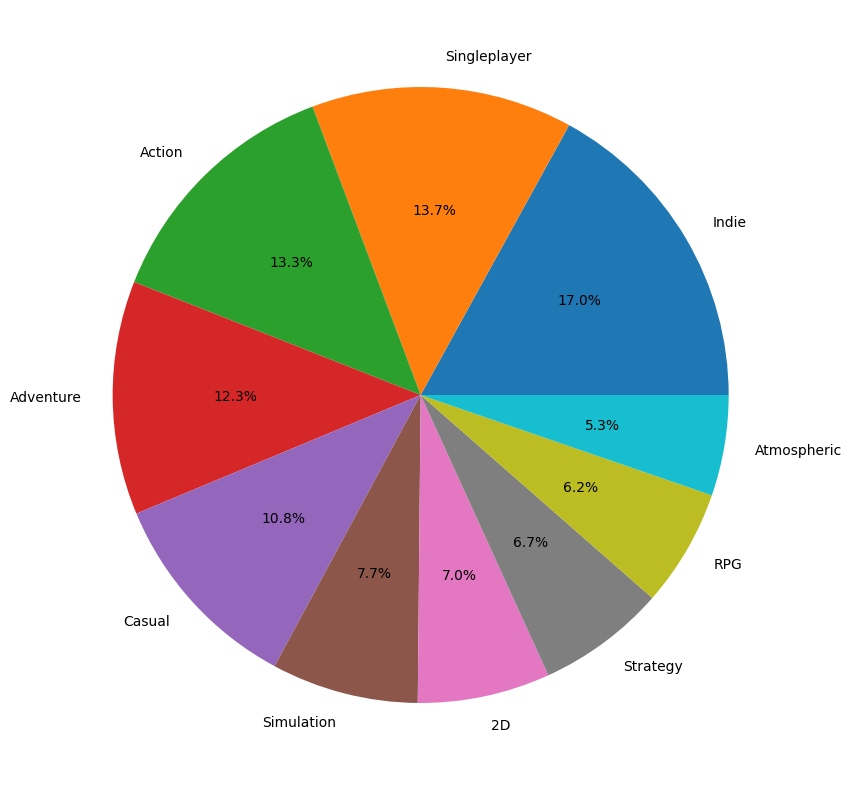

In [87]:
plt.figure(figsize=(10,10))
plt.pie(genre['value-counts'][:10],labels=genre['genre'][:10], autopct='%1.1f%%');

,genre,value counts
0,Indie,27957
1,Singleplayer,22565
2,Action,21895
3,Adventure,20181
4,Casual,17844
...,...,...
95,Interactive Fiction,1521
96,Drama,1520
97,Choose Your Own Adventure,1508
98,Walking Simulator,1498


In [13]:
recommendations=pd.read_csv('recommendations.csv')
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,49618,0
1,304390,4,0,2017-02-17,False,11.5,2482,1
2,1085660,2,0,2019-11-17,True,336.5,243365,2
3,703080,0,0,2022-09-23,True,27.4,248653,3
4,526870,0,0,2021-01-10,True,7.9,22898,4


In [14]:
users=pd.read_csv('users.csv')
users.head()

,user_id,products,reviews
0,7089523,359,0
1,13509147,156,1
2,8443010,329,4
3,4631165,176,3
4,4967668,98,2
